In [ ]:

from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [3]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [4]:

df.shape

(100, 3)

In [5]:

df.head()

,feature1,feature2,target
0,-2.308423,0.182014,-258.601676
1,1.077556,0.983811,50.535666
2,0.084833,-0.060517,-7.424043
3,0.467908,-0.473754,75.999152
4,1.099598,0.437085,39.204323


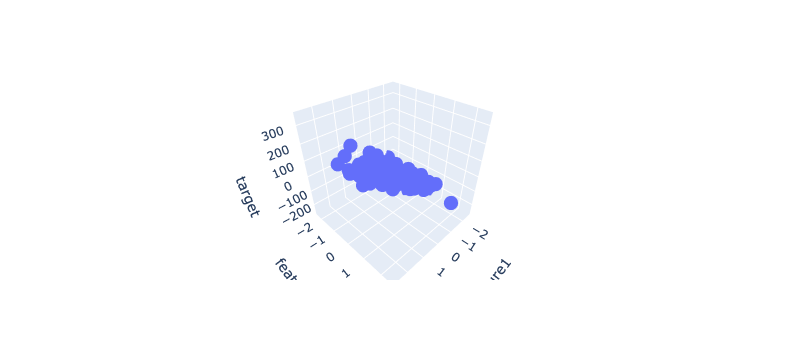

In [6]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()
     

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [15]:

from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

In [37]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 46.7260722044298
MSE 3089.2192466731676
R2 score 0.7896902406782603


In [41]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

# Define 'final' first
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

# Now use 'final' in the prediction
z_final = lr.predict(final).reshape(10,10)

z = z_final

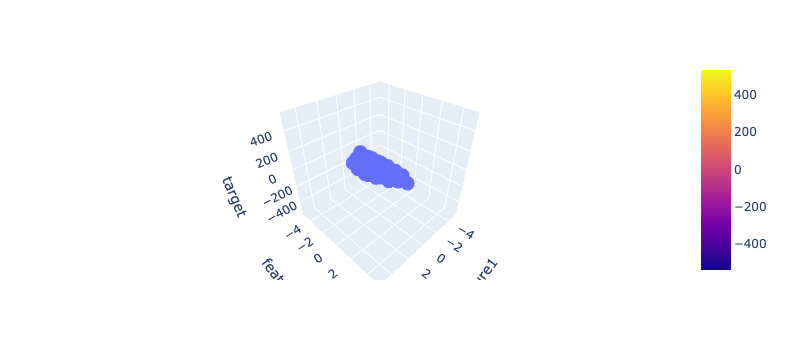

In [43]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()
     

In [45]:
lr.coef_
# this is our Beta1 and Beta 2

array([82.90829956, 24.50396316])

In [47]:
lr.intercept_
# this is our B0

-3.3073598196948026